In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Loading the dataset
health=pd.read_csv('/Users/mac/Desktop/DataScience/MKR-PROJECT/MENTAL HEALTH DATASET.csv')

In [3]:
health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
health.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
#Converting timestamp dtype from object to date time
health['Timestamp']=pd.to_datetime(health['Timestamp'])

In [7]:
health['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [8]:
#removing the outliers in age
def age_clean(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
health['Age'] = health['Age'].apply(age_clean)

In [9]:
health.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [10]:
health['Age'].dropna(inplace=True)

In [11]:
health['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49.,  5., 53., 61.,  8., 11., 72.])

In [12]:
health['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
female=['Female','female','Cis Female','F','Woman','f','Femake','woman','cis-female/femme','Female (cis)','femail']
male=['M','Male','male','m','Mail-ish','maile','Mal','Male (CIS)','Make','Man','msle','Mail','cis male','Malr','Cis Man']
trans=['Trans-female','something kinda male?','queer/she/they','non-binary','Nah','All', 'Enby','fluid', 'Genderqueer',
      'Androgyne', 'Agender','Guy (-ish) ^_^','male leaning androgynous','Trans woman','Neuter''Female (trans)',
      'queer','A little about you','ostensibly male','p','unsure what that really means']
def change_gender(gender):
    if gender in female:
        return 'Female'
    elif gender in male:
        return 'Male'
    else:
        return 'Trans'
health['Gender']=health['Gender'].apply(change_gender)
health['Gender'].unique()

array(['Female', 'Male', 'Trans'], dtype=object)

In [14]:
health.drop(['comments','state'],inplace=True,axis=1)

In [15]:
health.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [16]:
health.dropna(inplace=True)

In [17]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 18 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  973 non-null    datetime64[ns]
 1   Age                        973 non-null    float64       
 2   Gender                     973 non-null    object        
 3   Country                    973 non-null    object        
 4   self_employed              973 non-null    object        
 5   family_history             973 non-null    object        
 6   treatment                  973 non-null    object        
 7   work_interfere             973 non-null    object        
 8   no_employees               973 non-null    object        
 9   remote_work                973 non-null    object        
 10  tech_company               973 non-null    object        
 11  benefits                   973 non-null    object        
 12  care_o

In [18]:
health

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46.0,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31.0,Male,United States,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46.0,Male,United States,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41.0,Male,United States,No,No,Yes,Never,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,2015-08-25 19:59:38,36.0,Male,United States,No,Yes,No,Rarely,More than 1000,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32.0,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34.0,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [19]:
health.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [22]:
health.head(2)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46.0,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No


# ###########

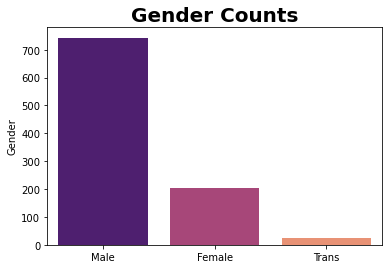

In [29]:
# For counts Gender
gender=health['Gender'].value_counts()
g=sns.barplot(gender.index,gender,data=health,palette='magma')
g.set_title("Gender Counts",fontsize=20,fontweight="bold");

Top 10 countries 

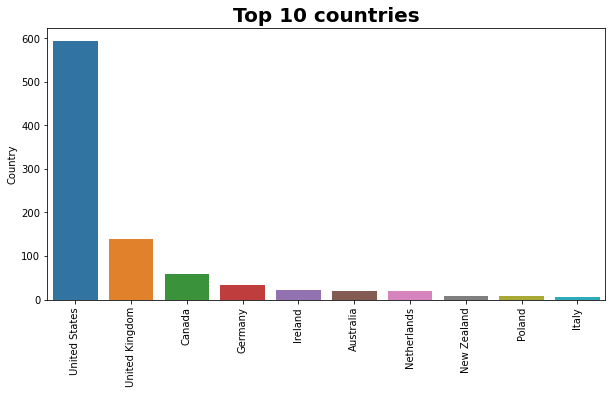

In [38]:
country=health['Country'].value_counts()[:10]
plt.figure(figsize=(10,5))
g=sns.barplot(country.index,country,data=health)
g.set_title("Top 10 countries",fontsize=20,fontweight="bold")
g.set_xticklabels(rotation=90,labels=country.index);

How many taking any treatments

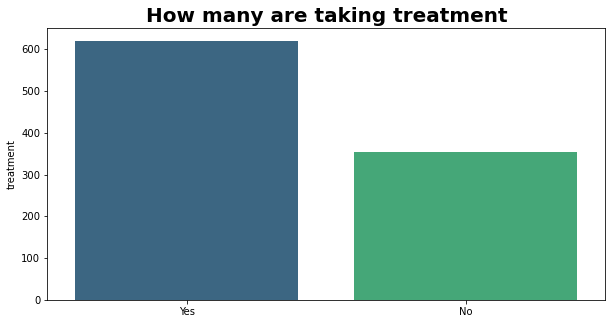

In [46]:
treatment=health['treatment'].value_counts()
plt.figure(figsize=(10,5))
g=sns.barplot(treatment.index,treatment,data=health,palette='viridis')
g.set_title("How many are taking treatment",fontsize=20,fontweight="bold");

Mental Health with respect to gender

In [49]:
mh=health.groupby('Gender')['treatment'].value_counts()
mh

Gender  treatment
Female  Yes          163
        No            41
Male    Yes          436
        No           307
Trans   Yes           21
        No             5
Name: treatment, dtype: int64

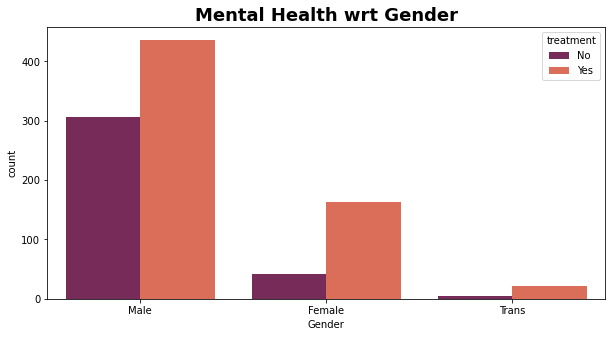

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender", hue="treatment", data=health,palette='rocket')
plt.title("Mental Health wrt Gender",fontsize=18,fontweight="bold");

Does family history has any effect on mental health?

In [62]:
fmh=health.groupby('family_history')['treatment'].value_counts()
fmh

family_history  treatment
No              No           270
                Yes          263
Yes             Yes          357
                No            83
Name: treatment, dtype: int64

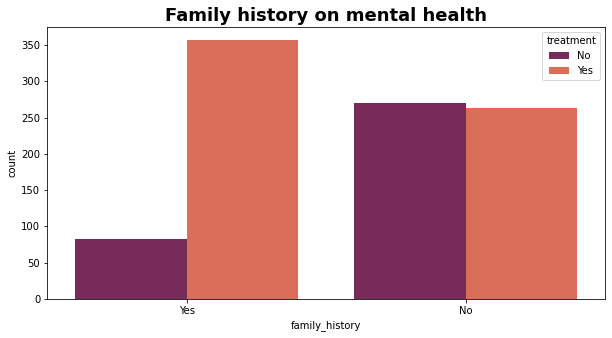

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x="family_history", hue="treatment", data=health,palette='rocket')
plt.title("Family history on mental health",fontsize=18,fontweight="bold");

If having cowerkers has any effect on mental health ?

In [65]:
health['coworkers'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [67]:
yes=['Yes','Some of them']
no=['No']
def coworkers(worker):
    if worker in yes:
        return "Yes"
    else:
        return "No"
health['coworkers']=health['coworkers'].apply(coworkers)
health['coworkers'].unique()

array(['Yes', 'No'], dtype=object)

In [68]:
cmh=health.groupby('coworkers')['treatment'].value_counts()
cmh

coworkers  treatment
No         Yes          116
           No            85
Yes        Yes          504
           No           268
Name: treatment, dtype: int64

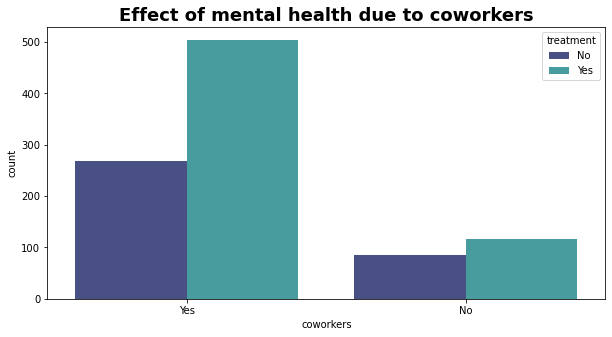

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x="coworkers", hue="treatment", data=health,palette='mako')
plt.title("Effect of mental health due to coworkers",fontsize=18,fontweight="bold");

In [73]:
health['phys_health_consequence'].value_counts()

No       698
Maybe    221
Yes       54
Name: phys_health_consequence, dtype: int64

Phy health conseq wrt treatment

In [74]:
pmh=health.groupby('phys_health_consequence')['treatment'].value_counts()
pmh

phys_health_consequence  treatment
Maybe                    Yes          144
                         No            77
No                       Yes          444
                         No           254
Yes                      Yes           32
                         No            22
Name: treatment, dtype: int64

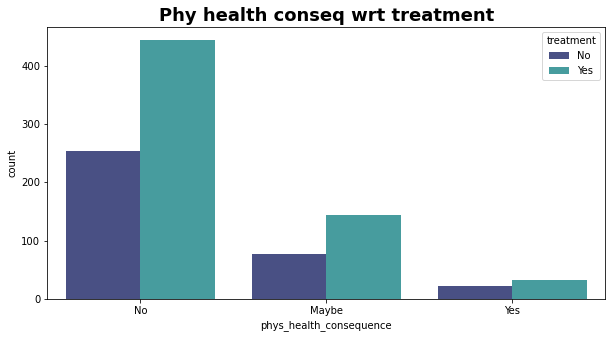

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x="phys_health_consequence", hue="treatment", data=health,palette='mako')
plt.title("Phy health conseq wrt treatment",fontsize=18,fontweight="bold");

Employee count of the country

In [76]:
health.head(2)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46.0,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Yes,Some of them,No,No,No,No


In [80]:
company=health['no_employees'].value_counts()
company

26-100            223
More than 1000    220
6-25              212
1-5               138
100-500           137
500-1000           43
Name: no_employees, dtype: int64

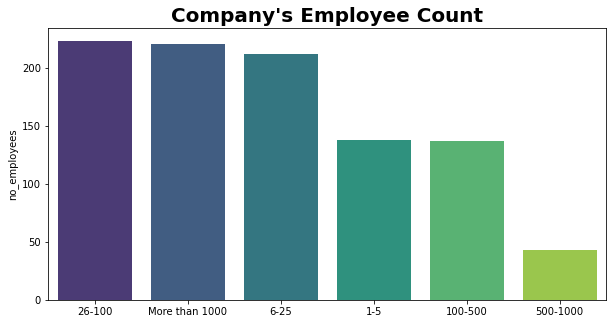

In [81]:
plt.figure(figsize=(10,5))
s=sns.barplot(company.index,company,data=health,palette='viridis')
s.set_title("Company's Employee Count",fontsize=20,fontweight="bold");

Employee count vs Treatment

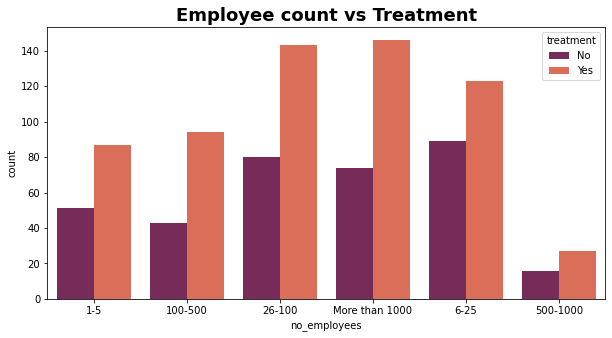

In [86]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=health,palette='rocket')
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.show()

Age and treatment

In [89]:
atm=health.groupby('Age')['treatment'].value_counts()
atm

Age   treatment
8.0   Yes          1
11.0  No           1
18.0  Yes          3
      No           2
19.0  Yes          4
                  ..
58.0  Yes          1
60.0  Yes          1
61.0  Yes          1
62.0  No           1
72.0  Yes          1
Name: treatment, Length: 81, dtype: int64

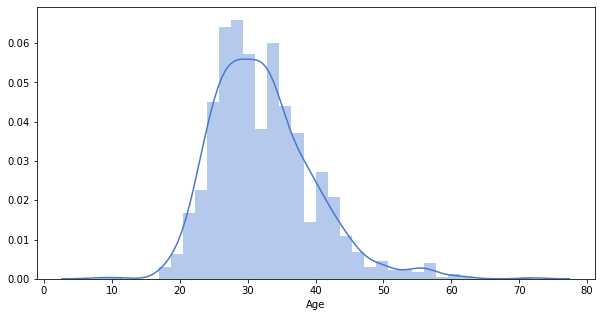

In [104]:
plt.figure(figsize=(10,5))
sns.distplot(health['Age']);

In [105]:
health.head(2)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46.0,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29.0,Male,United States,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Yes,Some of them,No,No,No,No


# QUICK OVERVIEW OF THE DATA

In [107]:
import pandas_profiling
pandas_profiling.ProfileReport(health)

In [109]:
#Exporting data to excel
health.to_excel('health2.xlsx')